<a href="https://colab.research.google.com/github/nfahrisalim/DS_Collection/blob/main/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ngulik Harga Rumah di Boston 🏡**

Dataset ini berisi data tentang **perumahan di Boston, MA**, yang dikumpulkan dari U.S. Census Service. Tiap kolom merepresentasikan faktor yang bisa memengaruhi harga rumah.  

### **📊 Deskripsi Kolom**  
🔹 **CRIM** → Tingkat kejahatan per kapita di tiap kota.  
🔹 **ZN** → Persentase lahan hunian untuk lot > 25.000 sqft.  
🔹 **INDUS** → Persentase area bisnis non-ritel di tiap kota.  
🔹 **CHAS** → Dummy variabel untuk Sungai Charles (**1 = dekat sungai, 0 = jauh dari sungai**).  
🔹 **NOX** → Konsentrasi nitrogen oksida (polusi udara).  
🔹 **RM** → Rata-rata jumlah kamar per rumah.  
🔹 **AGE** → Persentase rumah yang dibangun sebelum tahun 1940.  
🔹 **DIS** → Jarak rata-rata ke 5 pusat kerja di Boston.  
🔹 **RAD** → Indeks akses ke jalan raya radial.  
🔹 **TAX** → Tarif pajak properti per $10.000.  
🔹 **PTRATIO** → Rasio murid per guru di tiap kota.  
🔹 **B** → Ukuran proporsi populasi kulit hitam di tiap kota.  
🔹 **LSTAT** → Persentase populasi dengan status sosial ekonomi rendah.  
🔹 **MEDV** → **Target** → Harga median rumah (dalam ribuan dolar).  



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)

print(data.head(5))


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


kita bisa lihat kalau data kita punya rentang nilai yang beda-beda banget. Ini karena fitur-fitur tersebut diukur dan dicatat dengan unit yang berbeda-beda.

Nah, di sini pentingnya feature scaling: supaya semua fitur bisa punya skala yang mirip, biar analisis dan model kita jadi lebih akurat.

Normalisasi (Normalisation) atau juga dikenal sebagai min-max scaling, adalah teknik untuk menskala ulang nilai dalam suatu kolom sehingga berada dalam rentang tetap antara 0 dan 1.

In [8]:
X = data.drop('MEDV', axis=1)
Y = data['MEDV']

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)


X shape:  (506, 13)
Y shape:  (506,)


In [9]:
norm = MinMaxScaler()
normalised_features = norm.fit_transform(X)
normalised_df = pd.DataFrame(normalised_features, index = X.index, columns = X.columns)



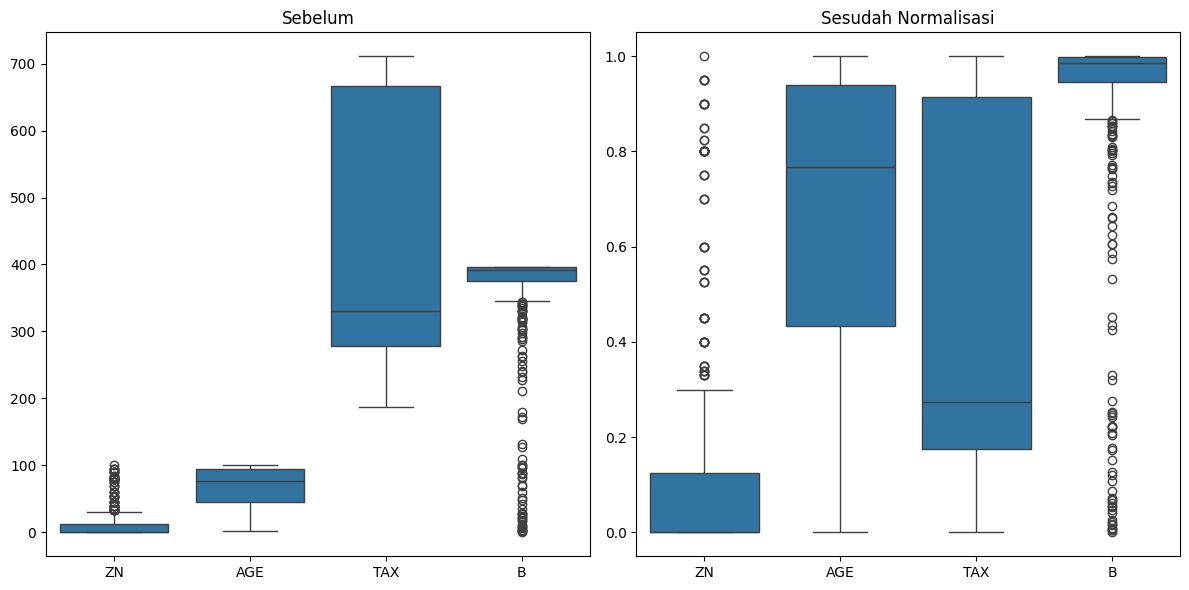

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sebelum
sns.boxplot(x='variable', y='value', data=pd.melt(data[['ZN', 'AGE', 'TAX', 'B']]), ax=ax[0])
ax[0].set_title('Sebelum')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# Sesudah
sns.boxplot(x='variable', y='value', data=pd.melt(normalised_df[['ZN', 'AGE', 'TAX', 'B']]), ax=ax[1])
ax[1].set_title('Sesudah Normalisasi')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


Seperti yang bisa kita lihat, fitur asli kita memiliki rentang yang sangat berbeda.

MinMaxScaler telah menskalakan ulang fitur-fitur kita sehingga nilainya berada di antara 0 dan 1.

Setelah kita memahami jenis model yang sensitif dan tidak sensitif terhadap penskalaan fitur, mari kita yakinkan diri dengan contoh konkret menggunakan dataset harga rumah di Boston.

Di sini, saya memilih 2 algoritma berbasis jarak (KNN dan SVR) serta 1 algoritma berbasis pohon (decision tree regressor) untuk memprediksi harga rumah.

Kita seharusnya melihat peningkatan performa model dengan penskalaan fitur pada KNN dan SVR, dan performa model yang konstan pada decision tree baik dengan atau tanpa penskalaan fitur.

In [11]:
# Model
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)

# Buat list dengan scaler beragam
scalers = [norm]

KNeighborsRegressor() → Membuat model K-Nearest Neighbors (KNN) Regression, yang memprediksi nilai berdasarkan rata-rata nilai dari tetangga terdekatnya.
SVR() → Membuat model Support Vector Regression (SVR), yang menggunakan Support Vector Machines (SVM) untuk regresi.
DecisionTreeRegressor(max_depth=10, random_state=42) → Membuat model Decision Tree Regression, yang membangun pohon keputusan dengan kedalaman maksimal 10 dan random_state=42 untuk hasil yang konsisten.



Bayangkan pohon keputusan seperti permainan 20 pertanyaan.

Jika Anda hanya bisa mengajukan 3 pertanyaan (max_depth=3), maka tebakan Anda mungkin masih kasar.
Jika Anda bisa bertanya 20 pertanyaan (max_depth=20), Anda bisa menebak dengan sangat spesifik, tapi mungkin malah terlalu rumit.

**Analoginya gini:**  

Bayangin kamu lagi main game yang ada fitur **random spawn** buat musuhnya. Kalau setiap kali main musuhnya muncul di tempat berbeda, kamu bakal sulit nebak strategi yang pas, kan?  

Nah, **`random_state` itu kayak nge-set "seed" di game** supaya musuh selalu muncul di tempat yang sama setiap kali kamu main. Jadi, kalau kamu pengen latihan strategi, kamu bisa ulang game itu dengan kondisi yang **selalu sama**, nggak berubah-ubah.  

Jadi, **`random_state=42` bikin hasil model kamu tetap sama setiap kali dijalankan**, biar gampang dibandingin dan nggak berubah terus kayak musuh di game yang spawn sembarangan. 🎮🔥

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (354, 13)
Y_train shape:  (354,)
X_test shape:  (152, 13)
Y_test shape:  (152,)


X → Fitur (independent variables) dalam dataset.
Y → Target (dependent variable) yang ingin diprediksi.
test_size=0.3 → 30% dari data akan digunakan sebagai data uji, sedangkan 70% sisanya digunakan sebagai data latih.

In [ ]:
knn_rmse = []

# Tanpa Feature Scaling
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Menerapkan teknik Scaling yang lain dan prediksi pakai KNN
for scaler in scalers:
    pipe = make_pipeline(scaler, knn)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

knn_df = pd.DataFrame({'RMSE': knn_rmse}, index=range(len(knn_rmse)))
print(knn_df)


       RMSE
0  5.562872
1  4.667070


Root Mean Squared Error